## The Future of Energy in Spain

This dataset contains 4 years of electrical consumption, generation and pricing data for Spain. It has been referenced from Kaggle. You can further information about it here: 

- https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather

The rows contain information for every hour. The goal is to present the analysis to a technical audience who might then be able to use these insights to perform further analysis as they see fit. 

Through this notebook we explore the energy data set and try and raise some interesting questions that the data might throw at us at an initial glance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy_df = pd.read_csv("energy_dataset.csv")

In [3]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
energy_df.drop(columns = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], 
               axis = 1, inplace = True)

In [6]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
energy_df.time.unique()

array(['2015-01-01 00:00:00+01:00', '2015-01-01 01:00:00+01:00',
       '2015-01-01 02:00:00+01:00', ..., '2018-12-31 21:00:00+01:00',
       '2018-12-31 22:00:00+01:00', '2018-12-31 23:00:00+01:00'],
      dtype=object)

A quick glance at the data set shows the different attributes we have in the data set. For starters we can say that this table is very versatile in the sense that this information can be useful to answer a host of questions. Questions related to what though? 

 - Analysis of different sources of energy in Spain?
 - How much of Spain's Energy comes from Sustainable vs Non-Sustainable energy resources? 
 - How does the load forecast fare vs the actual load? If there is a significant difference, what can be the reason? 
 

In [8]:
# Lets analyze the time information to see over what years is the information spread out
energy_df['time'] = pd.to_datetime(energy_df['time'], utc = 'True')

In [9]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [10]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

We see that most of the columns have the word generation as a prefix. Given that we are focusing only on generation output in this data set, having that word is redundant, and hence we get rid of it.

In [11]:
energy_df.columns = energy_df.columns.str.replace('generation', '')

In [12]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   time                               35064 non-null  datetime64[ns, UTC]
 1    biomass                           35045 non-null  float64            
 2    fossil brown coal/lignite         35046 non-null  float64            
 3    fossil coal-derived gas           35046 non-null  float64            
 4    fossil gas                        35046 non-null  float64            
 5    fossil hard coal                  35046 non-null  float64            
 6    fossil oil                        35045 non-null  float64            
 7    fossil oil shale                  35046 non-null  float64            
 8    fossil peat                       35046 non-null  float64            
 9    geothermal                        35046 non-null 

In [13]:
energy_df['time'].unique()

<DatetimeArray>
['2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
 '2015-01-01 01:00:00+00:00', '2015-01-01 02:00:00+00:00',
 '2015-01-01 03:00:00+00:00', '2015-01-01 04:00:00+00:00',
 '2015-01-01 05:00:00+00:00', '2015-01-01 06:00:00+00:00',
 '2015-01-01 07:00:00+00:00', '2015-01-01 08:00:00+00:00',
 ...
 '2018-12-31 13:00:00+00:00', '2018-12-31 14:00:00+00:00',
 '2018-12-31 15:00:00+00:00', '2018-12-31 16:00:00+00:00',
 '2018-12-31 17:00:00+00:00', '2018-12-31 18:00:00+00:00',
 '2018-12-31 19:00:00+00:00', '2018-12-31 20:00:00+00:00',
 '2018-12-31 21:00:00+00:00', '2018-12-31 22:00:00+00:00']
Length: 35064, dtype: datetime64[ns, UTC]

In [14]:
from datetime import datetime

In [15]:
energy_df['year'] = energy_df['time'].dt.year

In [16]:
energy_df = energy_df[1:]

In [17]:
energy_df['year'].value_counts()

2016    8784
2015    8760
2017    8760
2018    8759
Name: year, dtype: int64

We see that the the information is for a period of 4 years. 
Now that we have extracted the year, lets do an initial few visualizations to get an insight into Spain's main sources of energy

In [18]:
energy_year = energy_df.drop(columns = ['time', 'price day ahead', 'price actual'])
energy_year.head()

,biomass,fossil brown coal/lignite,fossil coal-derived gas,fossil gas,fossil hard coal,fossil oil,fossil oil shale,fossil peat,geothermal,hydro pumped storage consumption,...,other renewable,solar,waste,wind offshore,wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,year
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,71.0,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,2015
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,73.0,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,2015
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,75.0,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,2015
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,74.0,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,2015
5,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,2109.0,...,74.0,34.0,188.0,0.0,4618.0,4.0,4617.0,21441.0,19905.0,2015


In [19]:
energy_year = energy_year.groupby(by = 'year').sum()
energy_year.reset_index(inplace = True)
energy_year.head()

,year,biomass,fossil brown coal/lignite,fossil coal-derived gas,fossil gas,fossil hard coal,fossil oil,fossil oil shale,fossil peat,geothermal,...,other,other renewable,solar,waste,wind offshore,wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual
0,2015,4296887.0,4500640.0,0.0,44219558.0,46763558.0,2888127.0,0.0,0.0,0.0,...,681741.0,605254.0,12740026.0,1951034.0,0.0,47892428.0,12721150.0,47962238.0,248827308.0,247654833.0
1,2016,3209693.0,3343805.0,0.0,45163854.0,32086575.0,2512780.0,0.0,0.0,0.0,...,529444.0,708260.0,12347600.0,2267874.0,0.0,47565928.0,12412205.0,47600982.0,250475248.0,250270302.0
2,2017,2982499.0,4767198.0,0.0,56707674.0,37961816.0,2581870.0,0.0,0.0,0.0,...,431579.0,830368.0,13097794.0,2607470.0,0.0,47140553.0,13104795.0,47171096.0,252820092.0,252729579.0
3,2018,2950706.0,3090711.0,0.0,50958528.0,32341310.0,2471678.0,0.0,0.0,0.0,...,467964.0,857374.0,12023741.0,2616376.0,0.0,48902871.0,12221269.0,49101990.0,254613359.0,254516312.0


We see that a lot of columns have a value of zero in them. Lets filter out those columns to see if we need those columns.

In [20]:
null_df = energy_year[energy_year.isin([0])].dropna(axis = 1)
null_columns = null_df.columns

energy_year.drop(columns = null_columns, axis = 1, inplace = True)
energy_year.head()


,year,biomass,fossil brown coal/lignite,fossil gas,fossil hard coal,fossil oil,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,nuclear,other,other renewable,solar,waste,wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual
0,2015,4296887.0,4500640.0,44219558.0,46763558.0,2888127.0,4661835.0,7640098.0,22130743.0,54639739.0,681741.0,605254.0,12740026.0,1951034.0,47892428.0,12721150.0,47962238.0,248827308.0,247654833.0
1,2016,3209693.0,3343805.0,45163854.0,32086575.0,2512780.0,4970560.0,8979096.0,29711005.0,56025964.0,529444.0,708260.0,12347600.0,2267874.0,47565928.0,12412205.0,47600982.0,250475248.0,250270302.0
2,2017,2982499.0,4767198.0,56707674.0,37961816.0,2581870.0,3665975.0,6731848.0,14045592.0,55592099.0,431579.0,830368.0,13097794.0,2607470.0,47140553.0,13104795.0,47171096.0,252820092.0,252729579.0
3,2018,2950706.0,3090711.0,50958528.0,32341310.0,2471678.0,3367375.0,10715716.0,25409612.0,53266252.0,467964.0,857374.0,12023741.0,2616376.0,48902871.0,12221269.0,49101990.0,254613359.0,254516312.0


In [21]:
energy_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               4 non-null      int64  
 1    biomass                           4 non-null      float64
 2    fossil brown coal/lignite         4 non-null      float64
 3    fossil gas                        4 non-null      float64
 4    fossil hard coal                  4 non-null      float64
 5    fossil oil                        4 non-null      float64
 6    hydro pumped storage consumption  4 non-null      float64
 7    hydro run-of-river and poundage   4 non-null      float64
 8    hydro water reservoir             4 non-null      float64
 9    nuclear                           4 non-null      float64
 10   other                             4 non-null      float64
 11   other renewable                   4 non-null      float64
 12

In [22]:
fossil_df = energy_year.loc[:, ['year',
                                ' fossil brown coal/lignite', 
                                ' fossil gas',
                                ' fossil hard coal', 
                               ' fossil oil']]
fossil_df.head()

,year,fossil brown coal/lignite,fossil gas,fossil hard coal,fossil oil
0,2015,4500640.0,44219558.0,46763558.0,2888127.0
1,2016,3343805.0,45163854.0,32086575.0,2512780.0
2,2017,4767198.0,56707674.0,37961816.0,2581870.0
3,2018,3090711.0,50958528.0,32341310.0,2471678.0


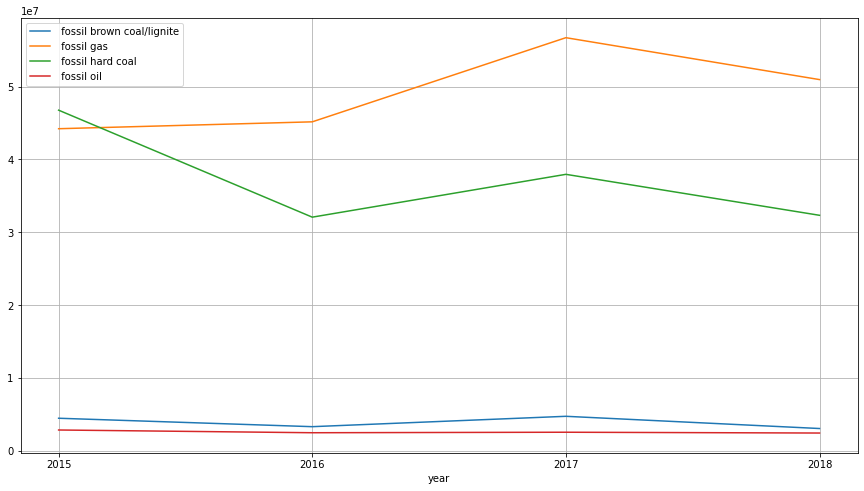

In [23]:
f = fossil_df.plot(x = 'year', y = [' fossil brown coal/lignite', 
                                ' fossil gas',
                                ' fossil hard coal', 
                               ' fossil oil'], figsize = (15,8), grid = True)
f.set_xticks(energy_year['year']);

As we can see that majority of the fossil generation comes from sources like fossil gas and coal while a very small portion comes from other non-renewable energy resources such as fossil oil and gas.

Likewise analyszing energy generation for the renewable energy resources.

In [24]:
renewable_df = energy_year.loc[:, ['year', 
                                   ' hydro pumped storage consumption', 
                                   ' hydro run-of-river and poundage', 
                                   ' hydro water reservoir',
                                   ' other renewable', 
                                   ' solar',
                                   ' wind onshore' ]]

# combining the different types of hyrdro as one column 'hydro'

renewable_df['hydro'] = renewable_df.loc[:, ' hydro pumped storage consumption' :
                                            ' hydro water reservoir'].sum(axis = 1)

renewable_df.head()

,year,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,other renewable,solar,wind onshore,hydro
0,2015,4661835.0,7640098.0,22130743.0,605254.0,12740026.0,47892428.0,34432676.0
1,2016,4970560.0,8979096.0,29711005.0,708260.0,12347600.0,47565928.0,43660661.0
2,2017,3665975.0,6731848.0,14045592.0,830368.0,13097794.0,47140553.0,24443415.0
3,2018,3367375.0,10715716.0,25409612.0,857374.0,12023741.0,48902871.0,39492703.0


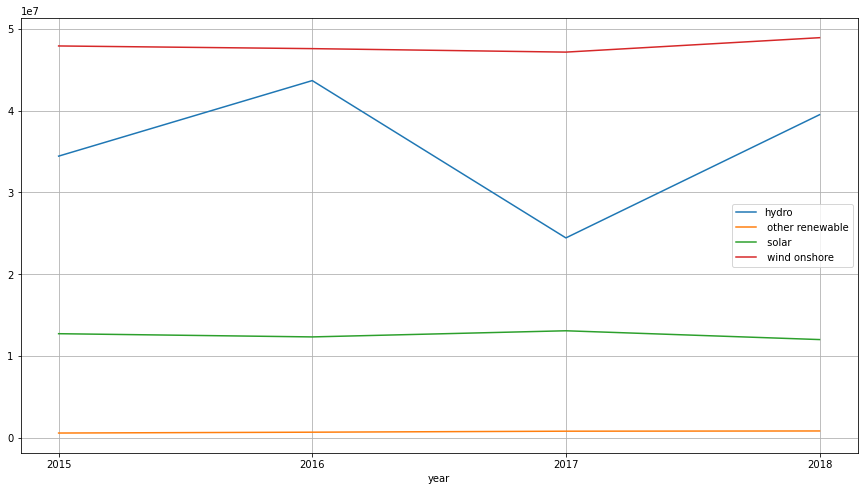

In [25]:
g = renewable_df.plot(x = 'year', y = ['hydro', 
                                   ' other renewable', 
                                   ' solar',
                                   ' wind onshore'], figsize = (15, 8), grid = True)
g.set_xticks(renewable_df['year']);

The plot above shows that wind seems to be the highest followed by hydro power. Hydro power appears to show an interesting trend having peaked in the year 2016 and then dropped the following year and picked back up in 2018. Solar seems to be have been fairly constant between 2015 to 2018. 

The above plots can be used to raise some interesting questions. But to whom might these trends be of value? 
The target audience here could be very diverse. For example Utilities and companies working to increase adoption of renewable energy. 
Some questions that we can ask are - 
1) What is the most underutilized resource of renewable energy in Spain? And what can be done about that? 

2) Likewise what is the most utilized energy resource? What are the factors for the increased adoption of that specific energy resource? 

3) We saw in increase in the adoption of hydro power in 2016 and a decrease in fossil fuel energy generation for the year 2016 and similarly a reverse trend for the year 2017. Thats interesting? What caused that change? Is it economical, political,or are there any other factors involved? 

4) Can we use this information to predict the generation in the upcoming years?

Moving forward lets focus on the load data provided.

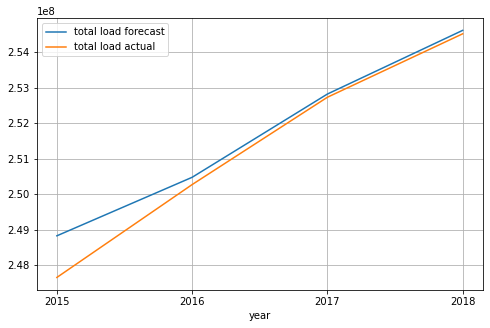

In [26]:
g2 = energy_year.plot(x = 'year', y = ['total load forecast','total load actual'], 
                      figsize = (8,5), grid = True)
g2.set_xticks(energy_year['year']);

From the line plots above we can see that for each year the load forecast has been higher than the actual load consumed. On an annual basis while this appears to be the case, is it true for on a day-to-day basis? Thats another question to investigate? 

Is there a trend in demand variation - perhaps every quarter, season or even everyday? 

In [27]:
energy_pricing = energy_df[['year', 'price day ahead', 'price actual']]

In [28]:
energy_pricing = energy_pricing.groupby(by = 'year').mean()
energy_pricing.reset_index(inplace = True)
energy_pricing.head()

,year,price day ahead,price actual
0,2015,50.324661,61.359949
1,2016,39.668449,47.438307
2,2017,52.233312,59.321965
3,2018,57.299726,63.444265


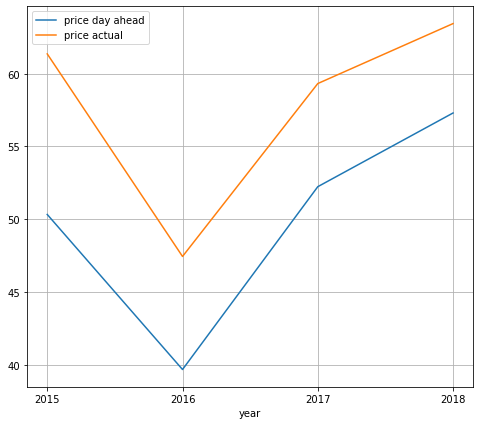

In [29]:
g3 = energy_pricing.plot(x = 'year', y = ['price day ahead','price actual'], figsize = (8, 7), grid = True)
g3.set_xticks(energy_pricing['year']);

We note a similar trend in the shape of the pricing but also note that there is a signigicant difference in magnitude in the pricing forecast vs actual. 
This pegs the question - how is the price forecast calculated? Can a better model be developed to calculate the value? 

In [30]:
energy_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               4 non-null      int64  
 1    biomass                           4 non-null      float64
 2    fossil brown coal/lignite         4 non-null      float64
 3    fossil gas                        4 non-null      float64
 4    fossil hard coal                  4 non-null      float64
 5    fossil oil                        4 non-null      float64
 6    hydro pumped storage consumption  4 non-null      float64
 7    hydro run-of-river and poundage   4 non-null      float64
 8    hydro water reservoir             4 non-null      float64
 9    nuclear                           4 non-null      float64
 10   other                             4 non-null      float64
 11   other renewable                   4 non-null      float64
 12

In [31]:
## compare histograms of load and generation

"""we start by calculating the total generation for each ear and then comparing against the total load consumed 
each year"""
energy_year['total generation'] = energy_year.loc[:, ' biomass':' wind onshore'].sum(axis = 1)
energy_year.head()


## plot stacked bar chart based on generation resources

# Then just submit for now.

,year,biomass,fossil brown coal/lignite,fossil gas,fossil hard coal,fossil oil,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,nuclear,other,other renewable,solar,waste,wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,total generation
0,2015,4296887.0,4500640.0,44219558.0,46763558.0,2888127.0,4661835.0,7640098.0,22130743.0,54639739.0,681741.0,605254.0,12740026.0,1951034.0,47892428.0,12721150.0,47962238.0,248827308.0,247654833.0,255611668.0
1,2016,3209693.0,3343805.0,45163854.0,32086575.0,2512780.0,4970560.0,8979096.0,29711005.0,56025964.0,529444.0,708260.0,12347600.0,2267874.0,47565928.0,12412205.0,47600982.0,250475248.0,250270302.0,249422438.0
2,2017,2982499.0,4767198.0,56707674.0,37961816.0,2581870.0,3665975.0,6731848.0,14045592.0,55592099.0,431579.0,830368.0,13097794.0,2607470.0,47140553.0,13104795.0,47171096.0,252820092.0,252729579.0,249144335.0
3,2018,2950706.0,3090711.0,50958528.0,32341310.0,2471678.0,3367375.0,10715716.0,25409612.0,53266252.0,467964.0,857374.0,12023741.0,2616376.0,48902871.0,12221269.0,49101990.0,254613359.0,254516312.0,249440214.0


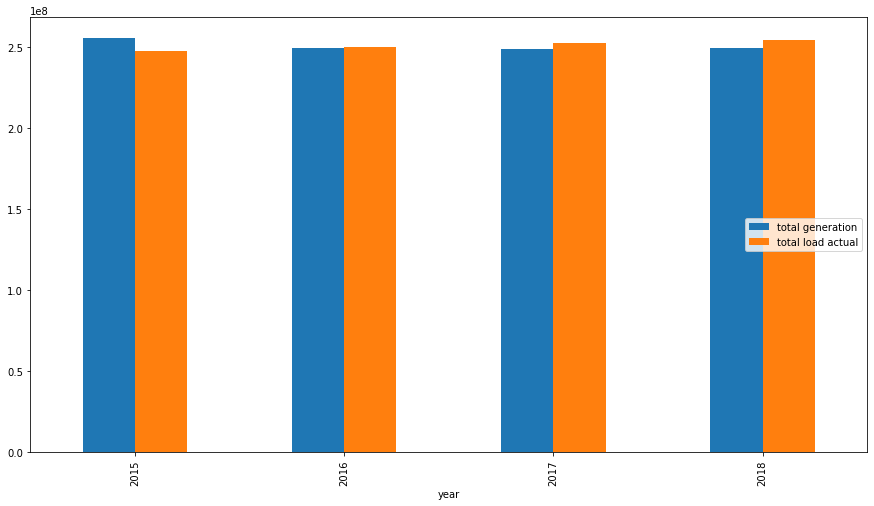

In [32]:
# plotting a bar chart of generation vs load
f2 = energy_year.plot(x = "year", y = ["total generation", "total load actual"], figsize = (15,8), kind = "bar")
f2.legend(loc = "center right");
plt.show()

The above plot gives an interesting insight into the load demand vs generation supply. It would be worth pondering about that fact that of the 4 years, 2015 was the only year where the generation was more than the load and each subsequent year the load has exceeded the generation. This is useful for Utility planners. 

1) What is the reason for the gap? Has Spains generation capabilities reduced? Or have the load requirments increased? 

2) What has caused the decrease in generation, or similarly what has caused the increase in load consumption?

3) Where has the deficit come from? And what can Spain do to be more self - sufficient?

4) Can we analyze the data on a dauly basis to notice a patternt that can help develop a solution to this problem?

In [33]:
energy_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               4 non-null      int64  
 1    biomass                           4 non-null      float64
 2    fossil brown coal/lignite         4 non-null      float64
 3    fossil gas                        4 non-null      float64
 4    fossil hard coal                  4 non-null      float64
 5    fossil oil                        4 non-null      float64
 6    hydro pumped storage consumption  4 non-null      float64
 7    hydro run-of-river and poundage   4 non-null      float64
 8    hydro water reservoir             4 non-null      float64
 9    nuclear                           4 non-null      float64
 10   other                             4 non-null      float64
 11   other renewable                   4 non-null      float64
 12

Another useful insight might be to see each year, what is the contribution of each energy resource towards the total generation. For this we can plot a stacked bar chart of the relevant columns.

In [34]:
energy_year['fossil'] = energy_year.loc[:, ' fossil brown coal/lignite':' fossil oil'].sum(axis = 1)
energy_year['hydro'] = energy_year.loc[:, ' hydro pumped storage consumption' : ' hydro water reservoir'].sum(axis = 1)
energy_year['other sources'] = energy_year.loc[:, ' other': ' other renewable'].sum(axis = 1)

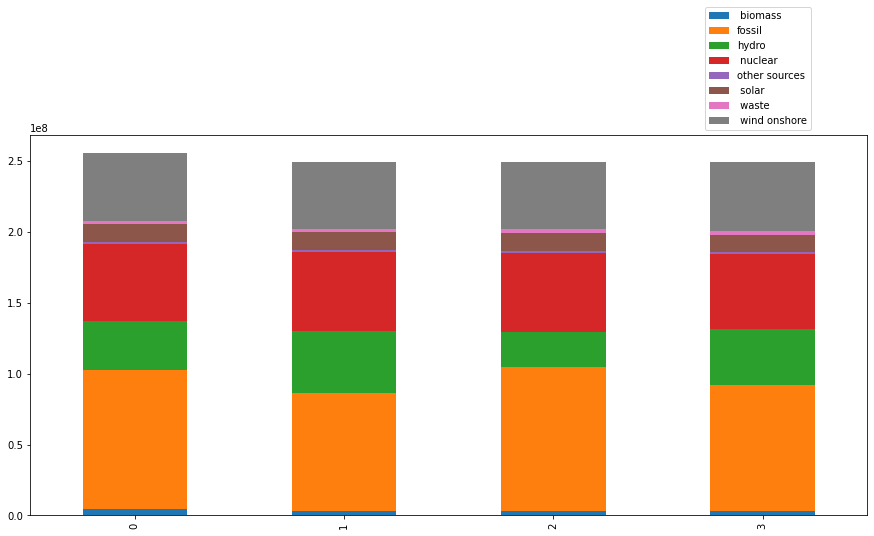

In [35]:
#energy_year = energy_year.set_index('year')
f3 = energy_year.loc[:, [' biomass', 
                         'fossil', 
                        'hydro', 
                        ' nuclear', 
                        'other sources',
                         ' solar',
                        ' waste', 
                        ' wind onshore']].plot(kind = "bar", stacked = True, figsize = (15,7))

plt.legend(loc = "lower left", bbox_to_anchor = (0.8, 1))
#f3.set_xlabel(energy_year['year'])
plt.show()

The chart above shows that in the years being analysed, a major portion of the energy comes from fossil fuels, nuclear, and wind. A fraction of the energy comes from renewable sources such as solar and hydro. Wind is a major significant renewable energy source. 

Some questions to ask here are : 

 - Can we forecast the energy output from Wind and Solar in the coming years? Can that be used to meet the increasing load demands and make Spain energy self-sufficient? 
 
 - Was the weather conducive for such siginificant wind energy output? Is Spain geographically more suited for Wind energy than solar? If so, should utilities invest more resources in identifying optimal sites for developing more wind power plants? Can we look at the weather information and predict what the conditions might be like in the upcoming years, and use that informtion to predict the wind energy output? 
 
 As we can see the above table raises more questions than it answers, which is a good thing when it comes to Exploratory Data Analysis. Subsequent analysis can involve further investigating of other information such as weather information, and combining the two data sets to come up with some data driven solutions.